# PlateReaderLib

PlateReaderLib is a simple library designed to parse the output data from the plate readers we have in the lab, giving back the data in a consistent and labelled form for further processing.

At the moment, we support XML output from a SpectraMax i3, and XLS output from a Perkins Elmer Victor3.

The basic workflow is the following:

1. Load data from the instrument
2. Create a set of labels for each plate, and label the data
3. Plot the data

Returned data will have a number of fields; at minimum 'Time' representing the time that a measurement was taken, and 'Data', the reading. We retain other data that is produced by the instrument, this can vary from instrument to instrument. For instance, the SpectraMax provides the wavelength on which readings were taken, while the Victor3 gives the measurement name ('Measurement').

# Get set up

Load the library, and set it up to autoreload so we can work on it and see the changes in here.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platereader

/Users/anton/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


# SpectraMax

Load our sample SpectraMax data

In [2]:
data = platereader.load_spectramax('./spectramax-sample-2.xml')
data.head()

,Time,Wavelength,Plate,ID,Well,Row,Col,Data
0,0 days,600,OD600,1,A1,1,1,0.0367
1,0 days,600,OD600,2,A2,1,2,0.0361
2,0 days,600,OD600,3,A3,1,3,0.0359
3,0 days,600,OD600,4,A4,1,4,0.0370
4,0 days,600,OD600,5,A5,1,5,0.0354


Create our labels by manually creating a dataframe:

In [3]:
labels = platereader.blank_plate_labels()

labels.loc['A',:5] = "Control"
labels.loc['B',:5] = "Blank"
labels.loc['C',:5] = "Sample 1"
labels.loc['D',:5] = "Sample 2"
labels.loc['E',:5] = "Sample 3"
labels.loc['F',:5] = "Sample 4"

labels

,1,2,3,4,5,6,7,8,9,10,11,12
A,Control,Control,Control,Control,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,Blank,Blank,Blank,Blank,Blank,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,Sample 1,Sample 1,Sample 1,Sample 1,Sample 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,Sample 2,Sample 2,Sample 2,Sample 2,Sample 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,Sample 3,Sample 3,Sample 3,Sample 3,Sample 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,Sample 4,Sample 4,Sample 4,Sample 4,Sample 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can show the labels in a slightly prettier format:

/Users/anton/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
platereader.py:131: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  annot=labels.fillna('').apply(lambda x: x.str.extract('(?:.* )*(.*)$')),
/Users/anton/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


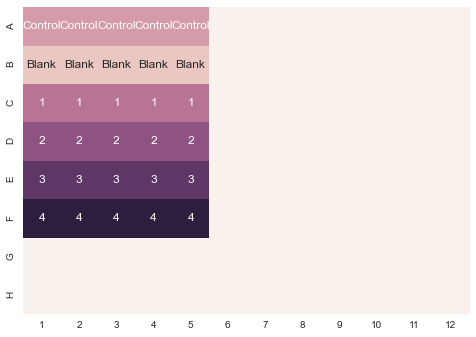

In [4]:
platereader.show_labels(labels)

Or we can load them by copy-pasting tab separated data (from Benchling, etc)

In [9]:
layout = '''
Control	Control	Control	Control	Control
Blank	Blank	Blank	Blank	Blank
Sample 1	Sample 1	Sample 1	Sample 1	Sample 1
Sample 2	Sample 2	Sample 2	Sample 2	Sample 2
Sample 3	Sample 3	Sample 3	Sample 3	Sample 3
Sample 4	Sample 4	Sample 4	Sample 4	Sample 4
'''

labels = platereader.labels_from_tsv(layout)

Now we apply the labels to the data:

In [10]:
labelled_data = platereader.label(data, labels)
labelled_data.head()

,Time,Wavelength,Plate,ID,Well,Row,Col,Data,Label
0,00:00:00,600,OD600,1,A1,1,1,0.0367,Control
1,03:33:00,600,OD600,1,A1,1,1,0.0427,Control
2,06:58:00,600,OD600,1,A1,1,1,0.0813,Control
3,08:51:00,600,OD600,1,A1,1,1,0.1777,Control
4,09:46:00,600,OD600,1,A1,1,1,0.2336,Control


And now we can make some plots:

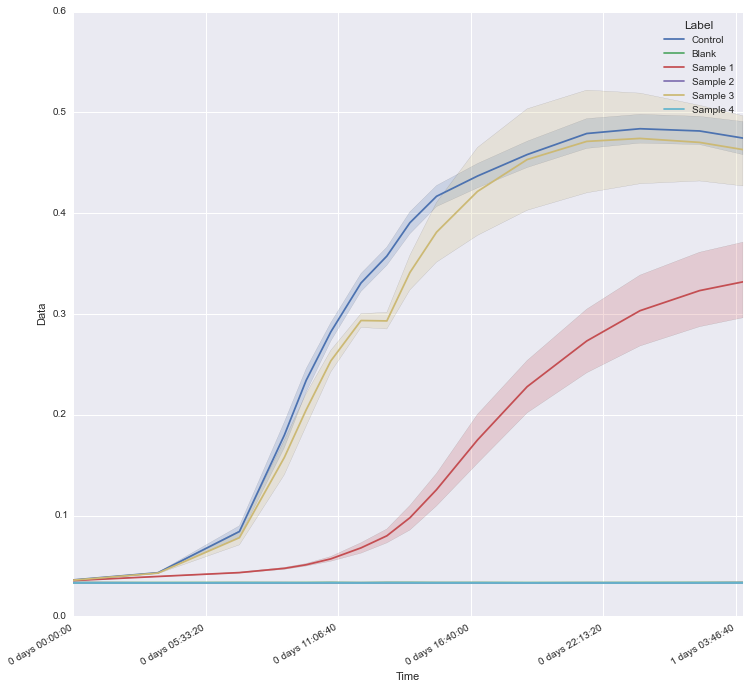

In [11]:
platereader.plot(labelled_data)

If we only care about a couple of samples.

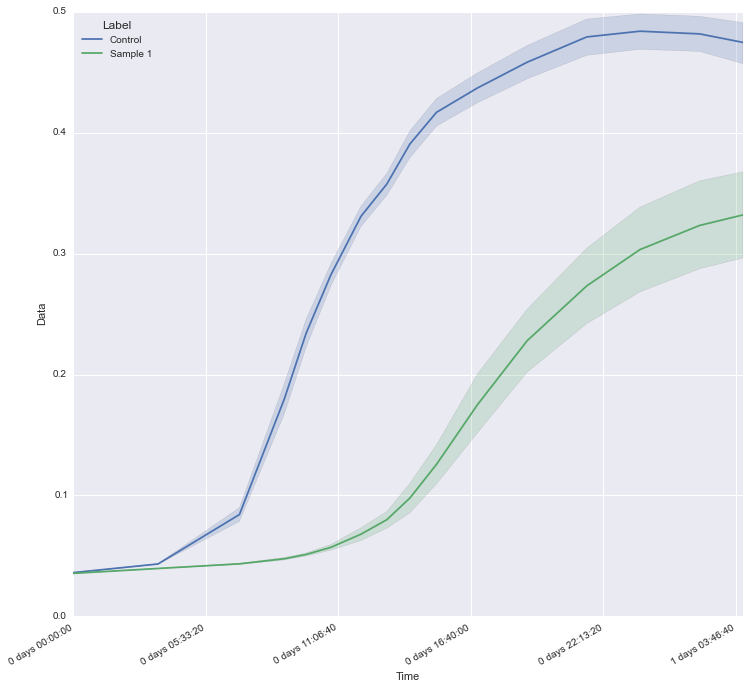

In [13]:
platereader.plot(labelled_data, ['Control', 'Sample 1'])

We can make these plots manually using SeaBorn for more control.

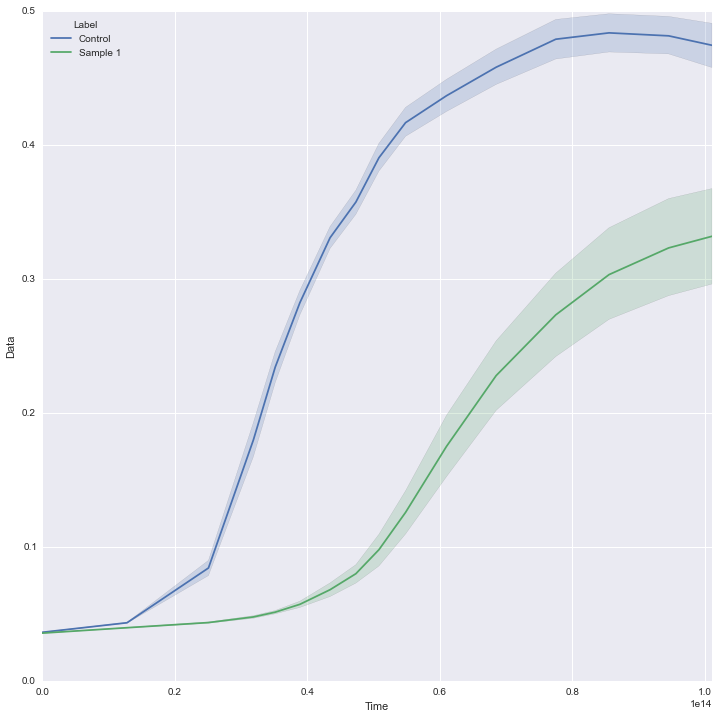

In [163]:
plt.figure(figsize=(12,12))
sns.tsplot(
    data=labelled_data[labelled_data['Label'].isin(['Control', 'Sample 1'])], 
    time="Time", 
    condition="Label", 
    unit="Well", 
    value="Data")

# Victor3

Likewise, we can read data from a Victor3.

WARNING *** file size (1061443) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


/Users/anton/University/Stanford/EndyLab/Code/platereaderlib/platereader.py:153: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data.dropna()[data['Label'].isin(labels)],
/Users/anton/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


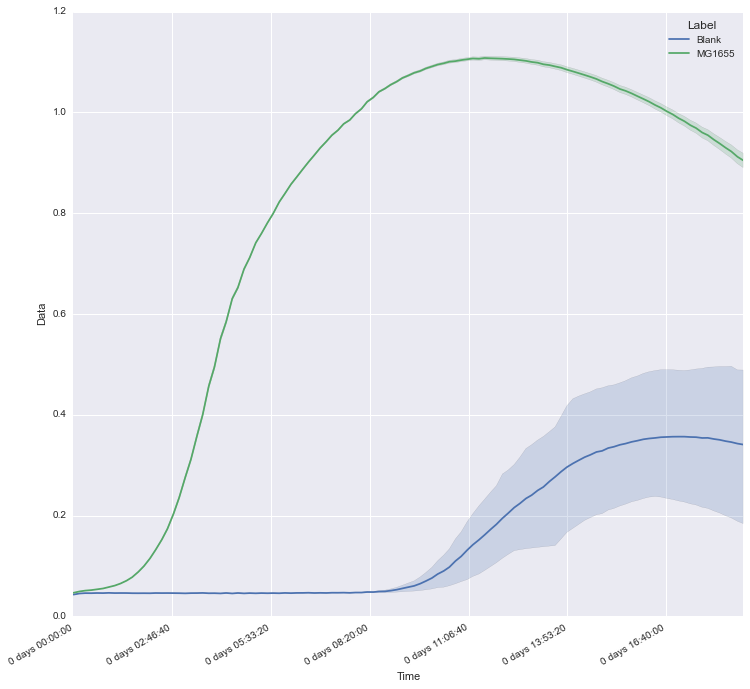

In [3]:
# Load data
data = platereader.load_victor3('./victor3-sample.xls')

# Create labels
labels = '''
Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655	MG1655
MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	MG1655	Blank	MG1655	MG1655	MG1655	MG1655
'''
labels = platereader.labels_from_tsv(labels)

# Label data
data = platereader.label(data, labels)

# Plot
platereader.plot(data)

In [1]:
data.head()

NameError: name 'data' is not defined